Alexander Bae<br>
DATA 71200: Advanced Data Analysis<br>
Prof. Johanna Devaney<br>
2021-06-12<br>

<b>Dataset</b>: [UCI Machine Learning Repository Abalone Dataset](https://archive.ics.uci.edu/ml/datasets/Abalone)

<h1>Importing Data</h1>

In [3]:
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings

# suppress warnings
warnings.filterwarnings("ignore")

# Obtain load the dataset from the UCI Repository archives
uci_link = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

# UCI dataset does not automatically provide headers; manually provide a list of headers for data
abalone_colnames = ['sex', 'shell_length', 'diameter', 'height', 'total_weight', 'shucked_weight', 'viscera_weight', 'shell_weight', 'rings'] 

# create dataframe using the link data, and the list of column names
abalone_df = pd.read_csv(uci_link, names = abalone_colnames)

<h1>Exploring and Preparing the Data</h1>

<h3>Basic Overview</h3>

In [ ]:
print(abalone_df.info())

We see that there are 9 different features; with the exception of 'sex', and 'rings', all other features are of the float data type and pertain to some aspect of the abalone's physical size.  The feature 'sex' is of the type 'object', which refers to strings.  Rings is an integer data type, but needs to be changed to float.  This is because the UCI dataset states that the number of rings plus 1.5 helps to determine the age of each individual abalone.

In [4]:
# create a column for age
abalone_df['age'] = abalone_df['rings'] + 1.5

# drop the rings column
abalone_df.drop('rings', axis = 1, inplace = True)

In [ ]:
# Examine the head of the data
abalone_df.head()

In [ ]:
# Examine the shape of the data
print("Number of (rows, columns): {}".format(abalone_df.shape))

In [ ]:
# Displaying the summary statistics of the data
abalone_df.describe()

<h3>Nulls, NA, Unique/Distinct Values</h3>

In [ ]:
print(abalone_df.isnull().sum())

In [ ]:
print(abalone_df['sex'].unique())

None of the columns require any dropping of duplicated values, and all values in the 'sex' column are uniform per distinct value.  However, there are still a few more steps that need to be taken for cleaning and preparation.

There are two forms of editing needed at this point: Because the 'I' value in the 'sex' column stands for 'infant', they do not have a designated biological sex, so rows with 'I' will be dropped.  In addition, dummy variables will need to be coded in order to implement machine learning models on categorical variables.

In [ ]:
print(abalone_df['sex'].value_counts())

In [5]:
# drop the rows that are recorded for infants
abalone_df = abalone_df[abalone_df.sex != 'I']

In [ ]:
# get new number of observations in the data frame
print(abalone_df.shape[0])

<h1>Splitting Data</h1>

In order to apply machine learning algorithms, the data will have to be split up accordingly using the scikit-learn's train_test_split function.  A random seed of 42 will be used to preserve reproducibility, and the train-test split will be 80-20

In [6]:
# create data frame consisting of numeric predictors
X = abalone_df.drop(['shell_length', 'sex'], axis = 1)

# place sex into its own variable for potential later use
X_cat = abalone_df['sex']

# target feature
y = abalone_df['shell_length']

In [7]:
# split into the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

<h3>Examining the split data</h3>

In [33]:
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2268 entries, 4044 to 1170
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   diameter        2268 non-null   float64
 1   height          2268 non-null   float64
 2   total_weight    2268 non-null   float64
 3   shucked_weight  2268 non-null   float64
 4   viscera_weight  2268 non-null   float64
 5   shell_weight    2268 non-null   float64
 6   age             2268 non-null   float64
dtypes: float64(7)
memory usage: 141.8 KB
None


In [32]:
X_train.describe()

,diameter,height,total_weight,shucked_weight,viscera_weight,shell_weight,age
count,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000,2268.000000
mean,0.447456,0.154969,1.023375,0.442137,0.223908,0.293107,12.408730
std,0.078912,0.038637,0.459130,0.215412,0.103178,0.130444,3.024682
min,0.110000,0.015000,0.015500,0.006500,0.003000,0.005000,4.500000
25%,0.400000,0.135000,0.699875,0.285000,0.151000,0.201875,10.500000
50%,0.460000,0.155000,1.006500,0.433250,0.217500,0.285000,11.500000
75%,0.500000,0.175000,1.298875,0.570000,0.289625,0.370000,13.500000
max,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


<h1>Data Visualization</h1>

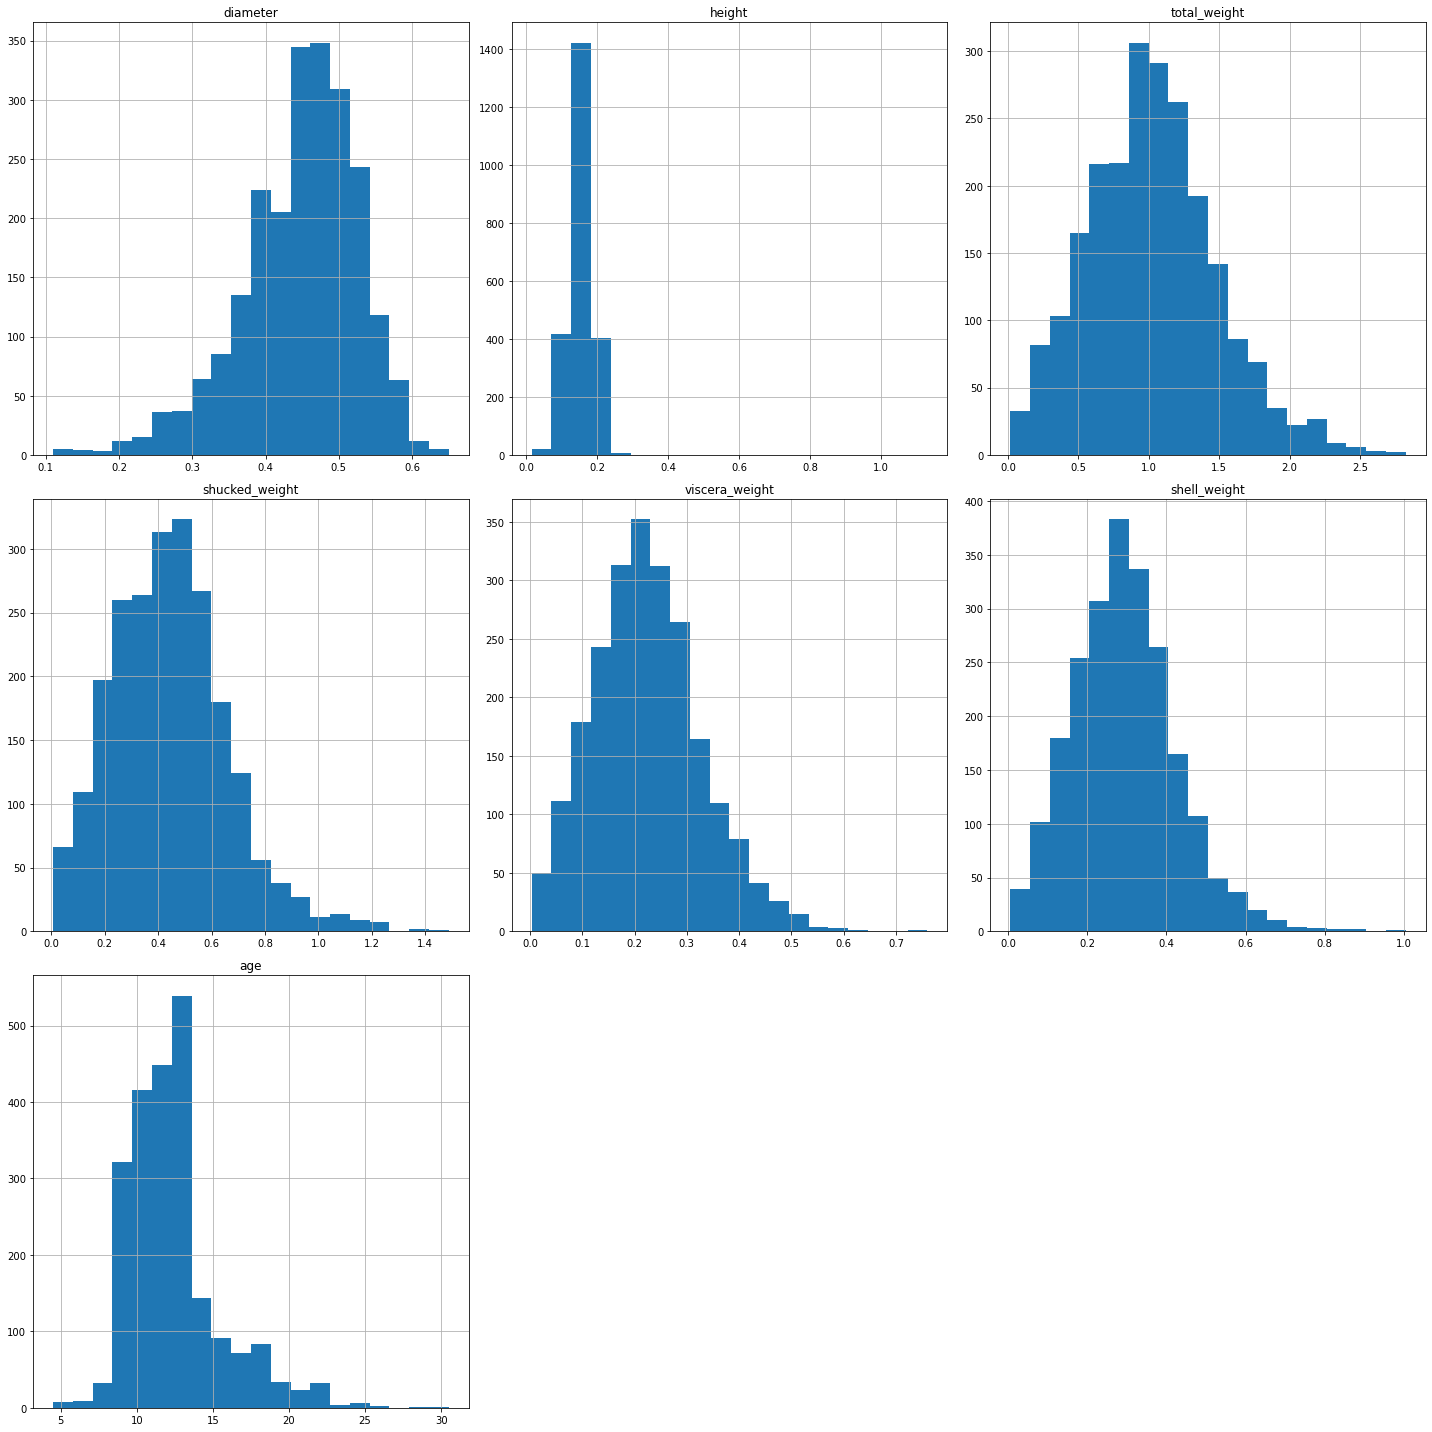

In [63]:
# Examine the predictor variable distributions
X_train.hist(bins = 20, figsize = (20,20))
plt.tight_layout()
plt.show()

<h3>Boxplots</h3>

<AxesSubplot:>

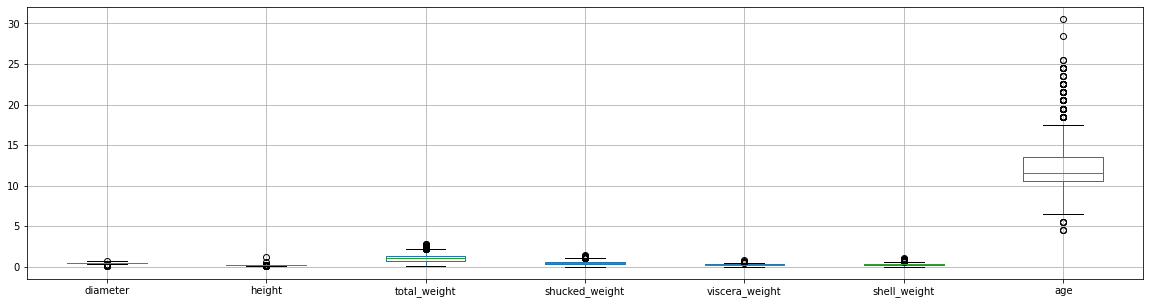

In [40]:
X_train.boxplot(figsize=(20,5), grid=True)

<AxesSubplot:>

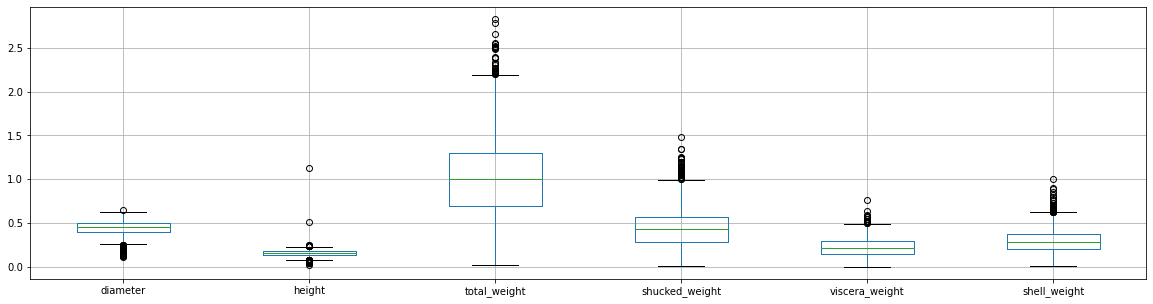

In [41]:
# the same boxplot as above, but removing age for better zoom
X_train.drop('age', axis = 1).boxplot(figsize=(20,5), grid=True)

<h3>Scatter Matrix</h3>

array([[<AxesSubplot:xlabel='diameter', ylabel='diameter'>,
        <AxesSubplot:xlabel='height', ylabel='diameter'>,
        <AxesSubplot:xlabel='total_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='age', ylabel='diameter'>],
       [<AxesSubplot:xlabel='diameter', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>,
        <AxesSubplot:xlabel='total_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='height'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='height'>,
        <AxesSubplot:xlabel='age', ylabel='height'>],
       [<AxesSubplot:xlabel='diameter', ylabel='total_weight'>,
        <AxesSubplot:xlabel='height', ylabel='total_weight'>,
        <AxesSubplot

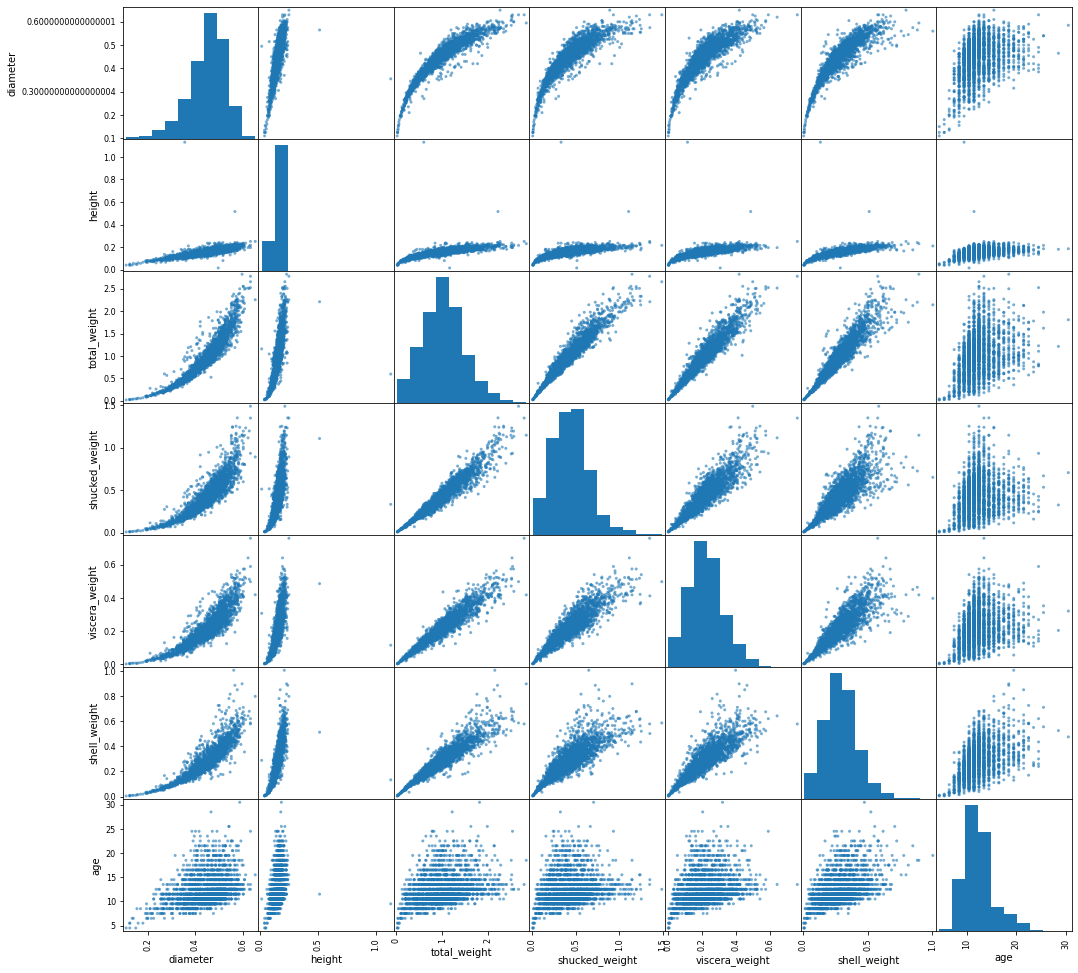

In [64]:
pd.plotting.scatter_matrix(X_train, alpha=0.6, figsize=(17, 17), diagonal='hist')

<h1>Data Transformations</h1>

<h3>Squaring</h3>

In [58]:
sq = (X_train**2)

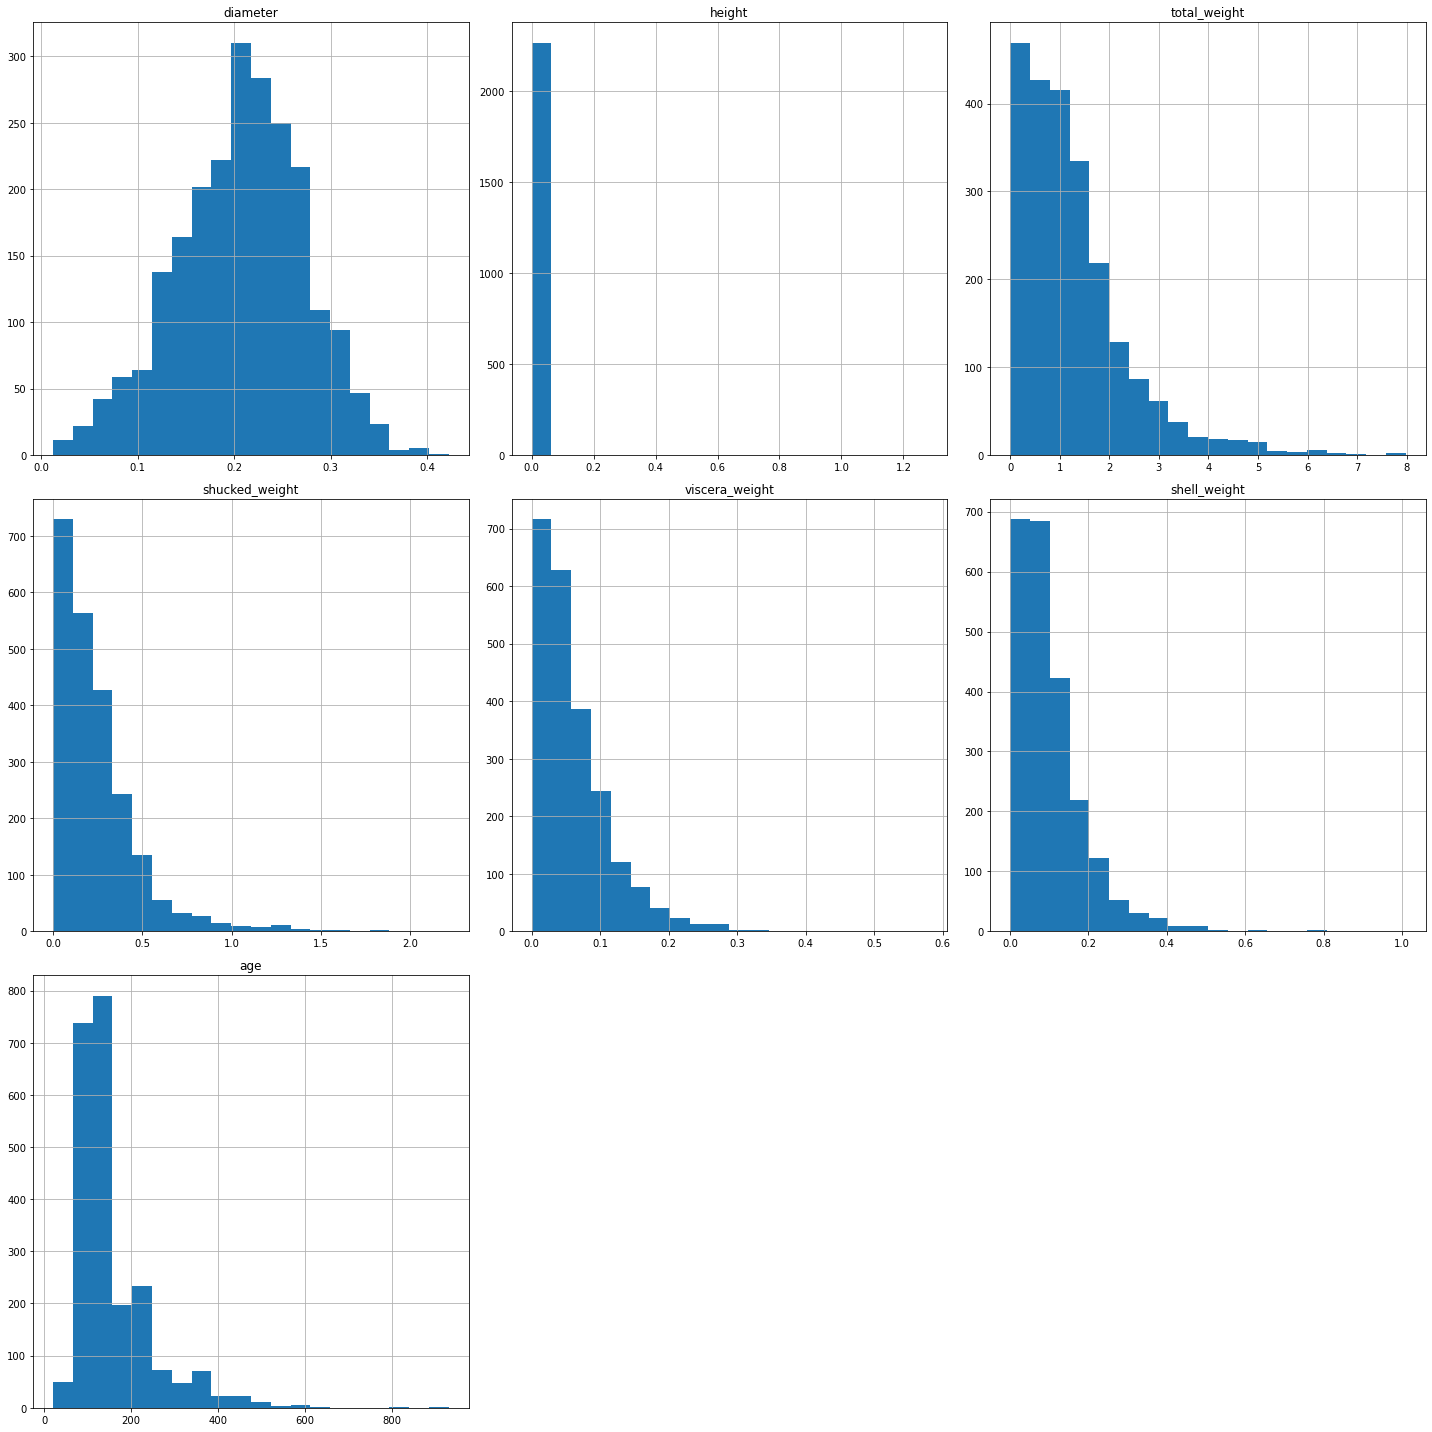

In [62]:
sq.hist(bins = 20, figsize = (20,20))
plt.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='diameter', ylabel='diameter'>,
        <AxesSubplot:xlabel='height', ylabel='diameter'>,
        <AxesSubplot:xlabel='total_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='age', ylabel='diameter'>],
       [<AxesSubplot:xlabel='diameter', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>,
        <AxesSubplot:xlabel='total_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='height'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='height'>,
        <AxesSubplot:xlabel='age', ylabel='height'>],
       [<AxesSubplot:xlabel='diameter', ylabel='total_weight'>,
        <AxesSubplot:xlabel='height', ylabel='total_weight'>,
        <AxesSubplot

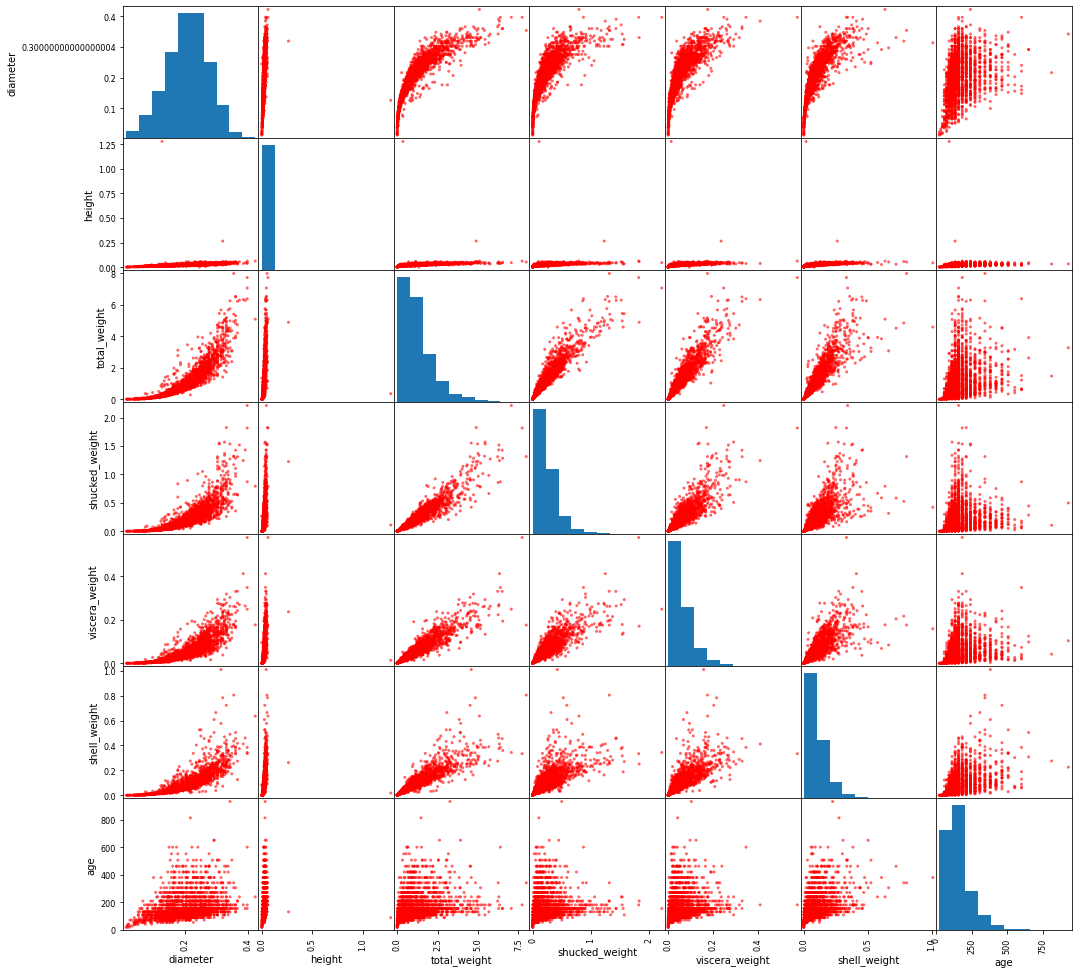

In [69]:
pd.plotting.scatter_matrix(sq, alpha=0.6, figsize=(17, 17), diagonal='hist')

<h3>Cubed</h3>

In [66]:
cu = (X_train**3)

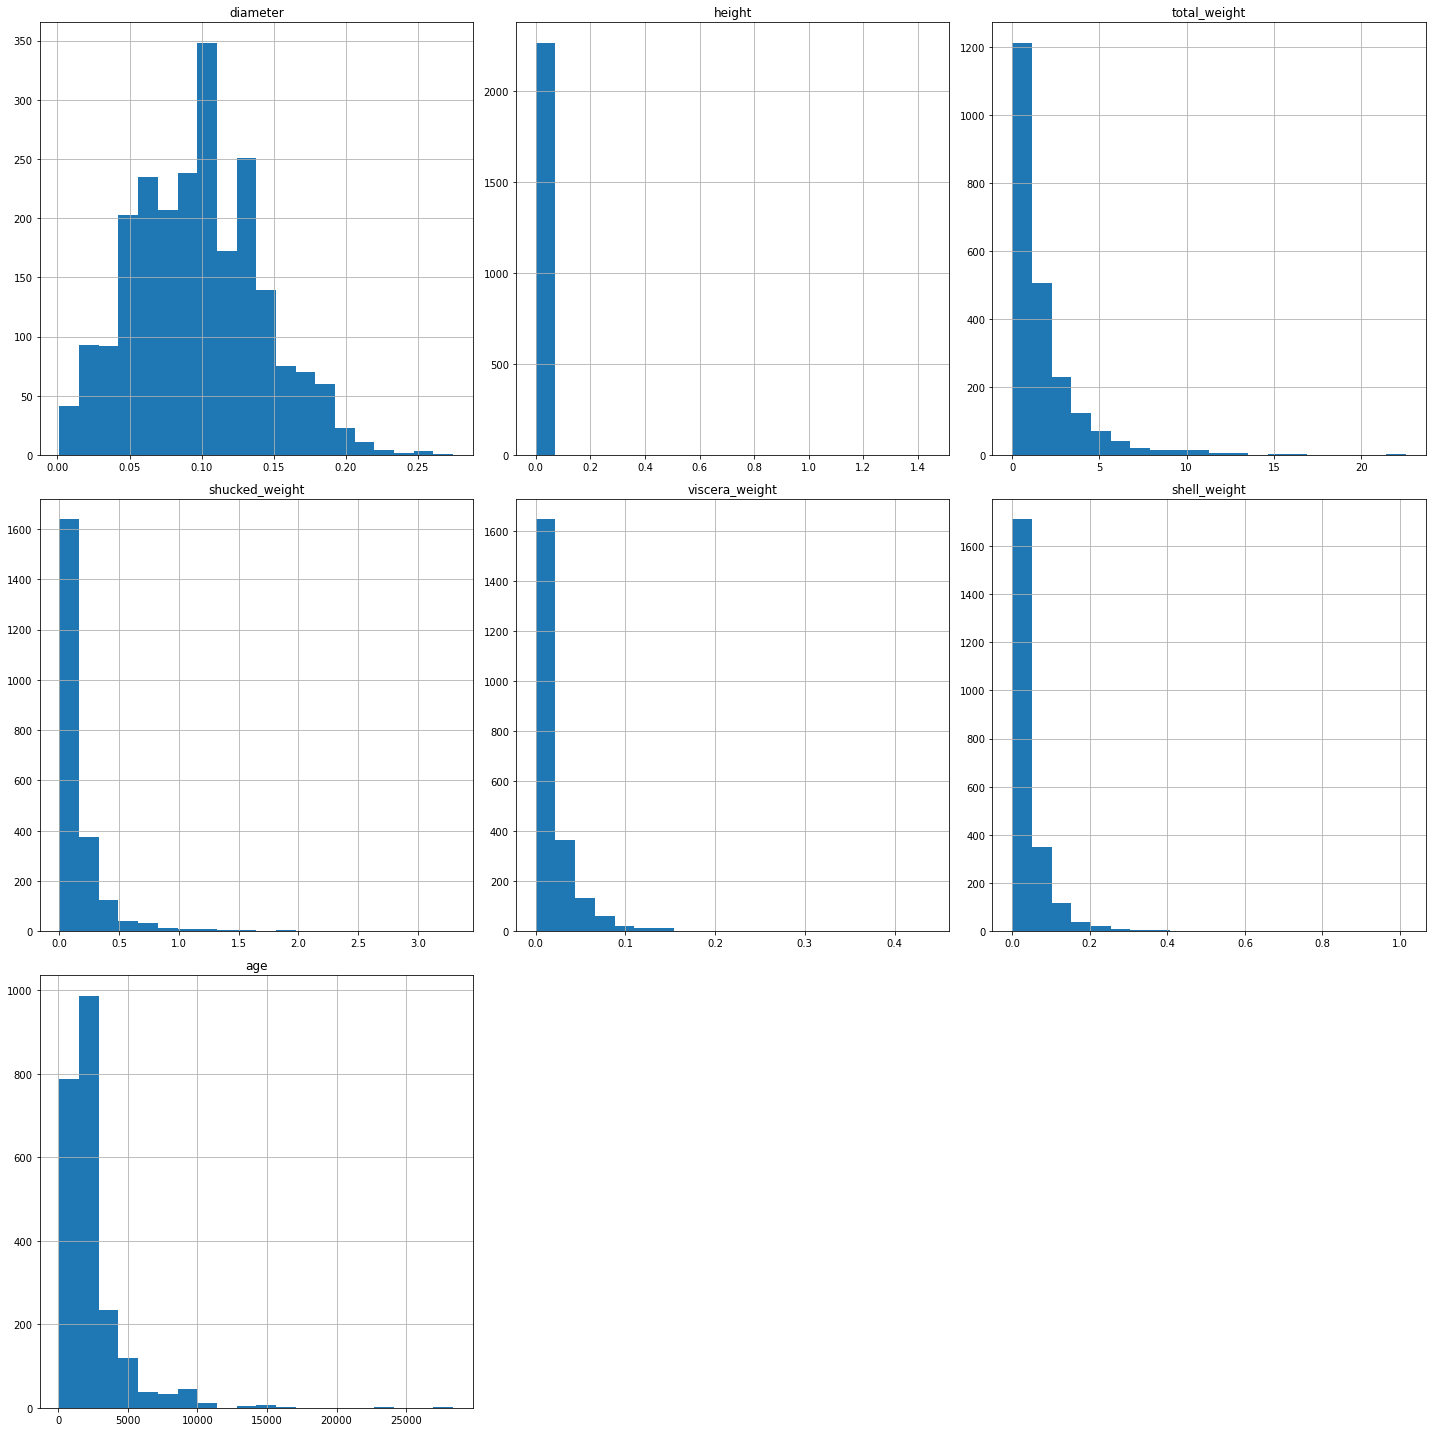

In [67]:
cu.hist(bins = 20, figsize = (20,20))
plt.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='diameter', ylabel='diameter'>,
        <AxesSubplot:xlabel='height', ylabel='diameter'>,
        <AxesSubplot:xlabel='total_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='age', ylabel='diameter'>],
       [<AxesSubplot:xlabel='diameter', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>,
        <AxesSubplot:xlabel='total_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='height'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='height'>,
        <AxesSubplot:xlabel='age', ylabel='height'>],
       [<AxesSubplot:xlabel='diameter', ylabel='total_weight'>,
        <AxesSubplot:xlabel='height', ylabel='total_weight'>,
        <AxesSubplot

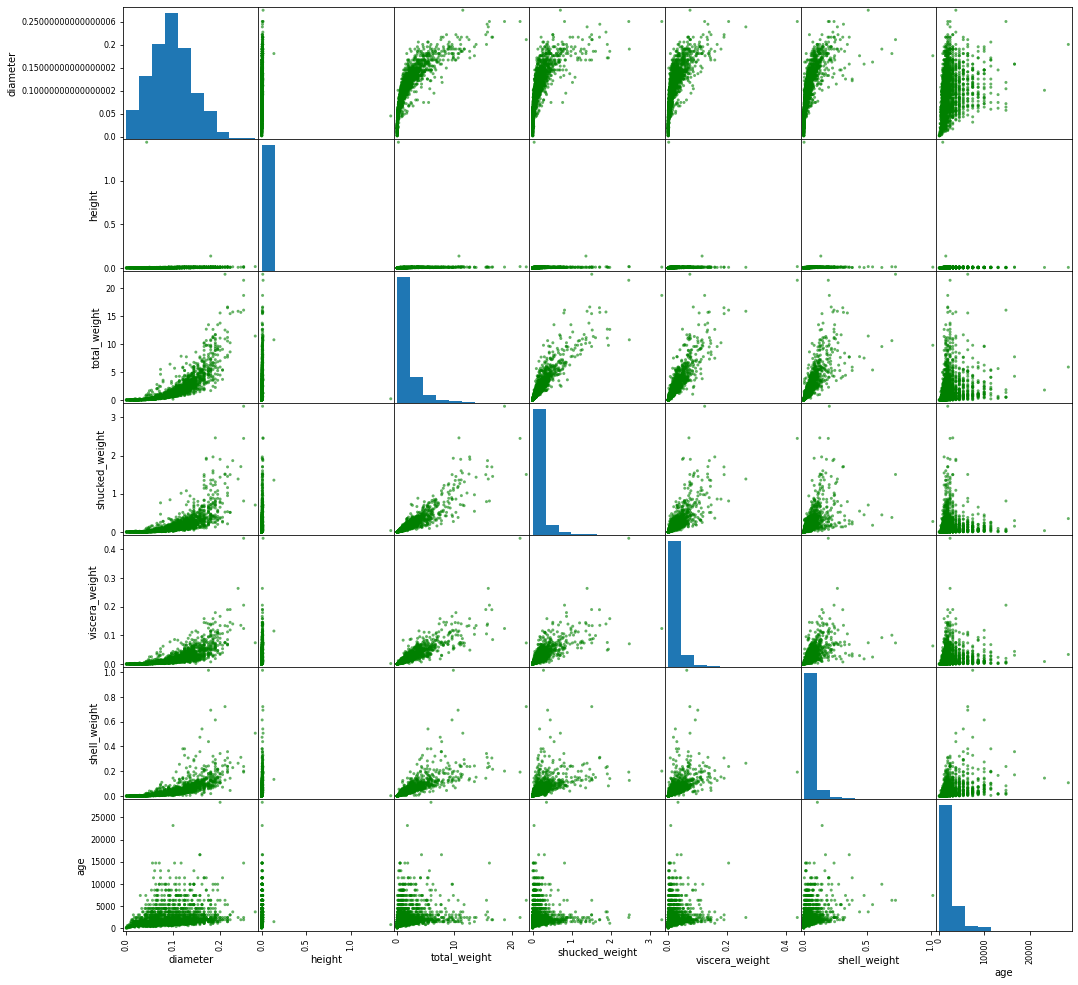

In [70]:
pd.plotting.scatter_matrix(cu, alpha=0.6, figsize=(17, 17), diagonal='hist')

<h3>Logarithmic</h3>

In [71]:
log = np.log(X_train)

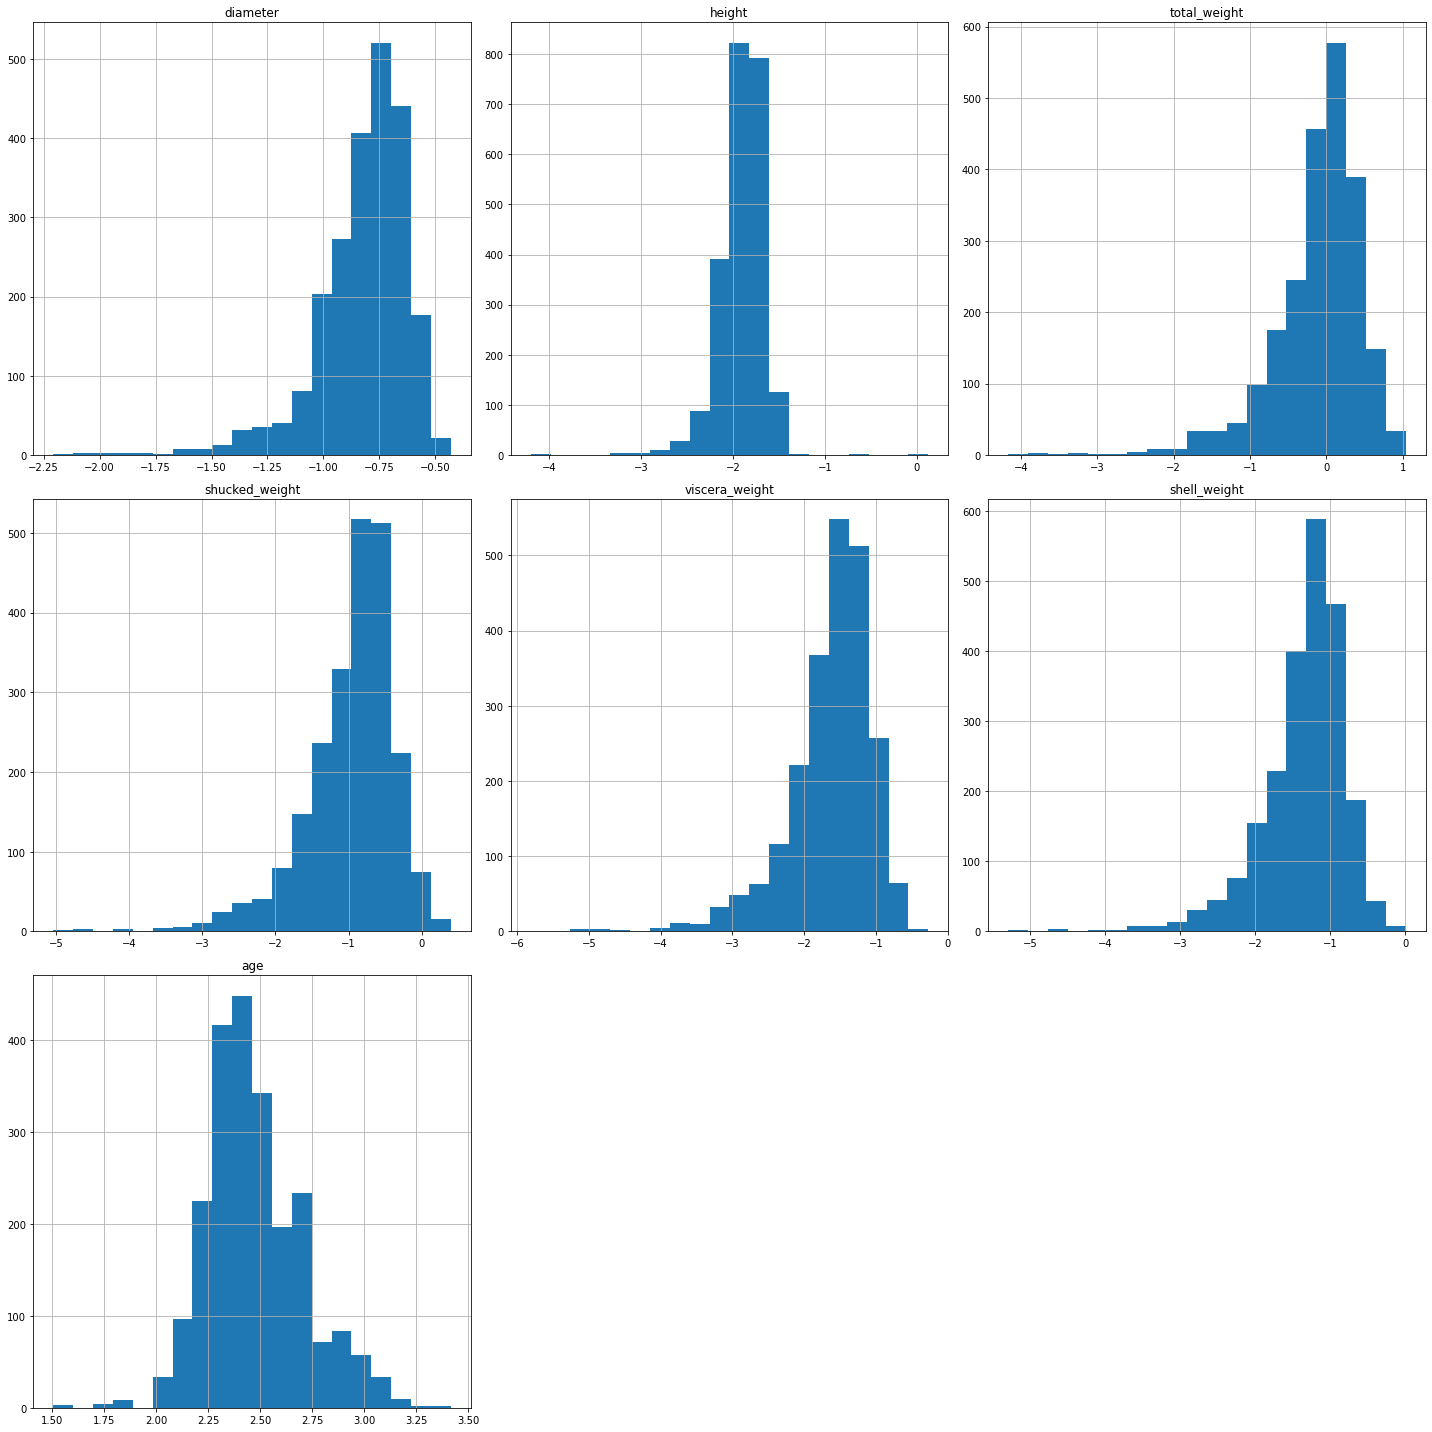

In [72]:
log.hist(bins = 20, figsize = (20,20))
plt.tight_layout()
plt.show()

array([[<AxesSubplot:xlabel='diameter', ylabel='diameter'>,
        <AxesSubplot:xlabel='height', ylabel='diameter'>,
        <AxesSubplot:xlabel='total_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='diameter'>,
        <AxesSubplot:xlabel='age', ylabel='diameter'>],
       [<AxesSubplot:xlabel='diameter', ylabel='height'>,
        <AxesSubplot:xlabel='height', ylabel='height'>,
        <AxesSubplot:xlabel='total_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shucked_weight', ylabel='height'>,
        <AxesSubplot:xlabel='viscera_weight', ylabel='height'>,
        <AxesSubplot:xlabel='shell_weight', ylabel='height'>,
        <AxesSubplot:xlabel='age', ylabel='height'>],
       [<AxesSubplot:xlabel='diameter', ylabel='total_weight'>,
        <AxesSubplot:xlabel='height', ylabel='total_weight'>,
        <AxesSubplot

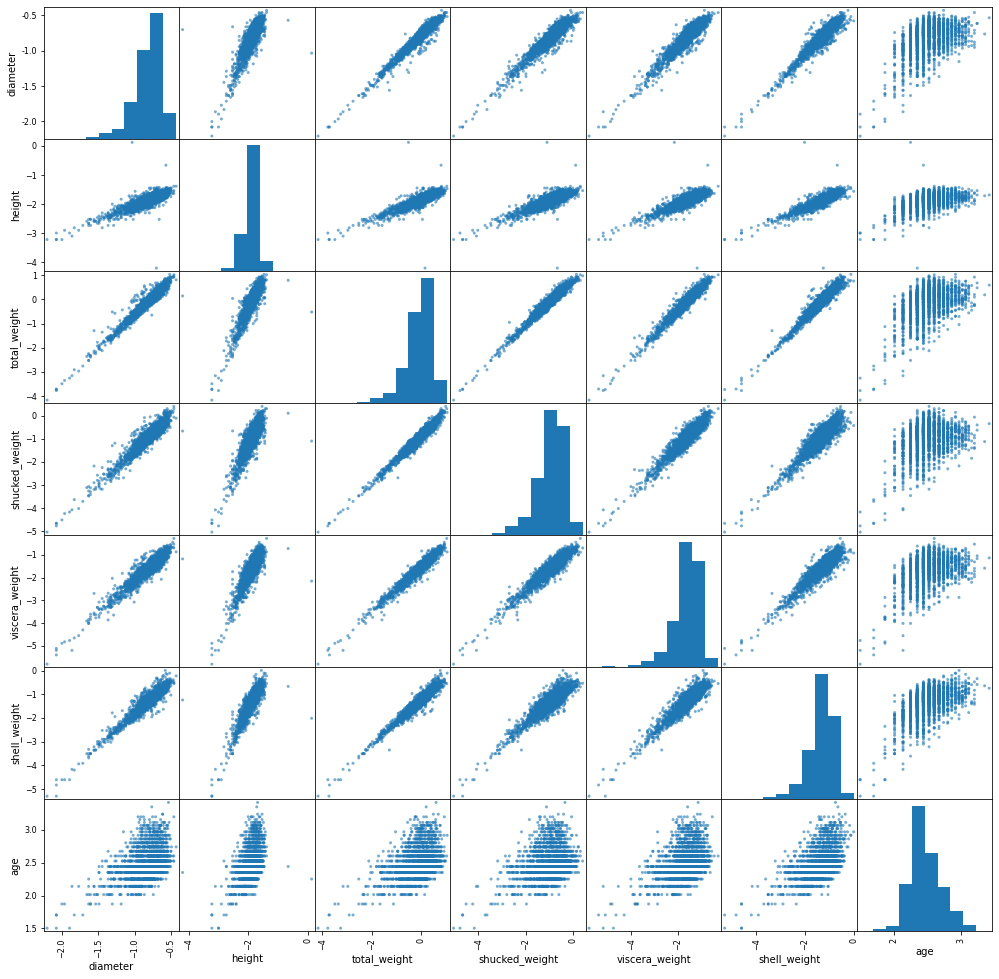

In [73]:
pd.plotting.scatter_matrix(log, alpha=0.6, figsize=(17, 17), diagonal='hist')

<h3>Exponential</h3>

In [74]:
exp = np.exp(X_train)

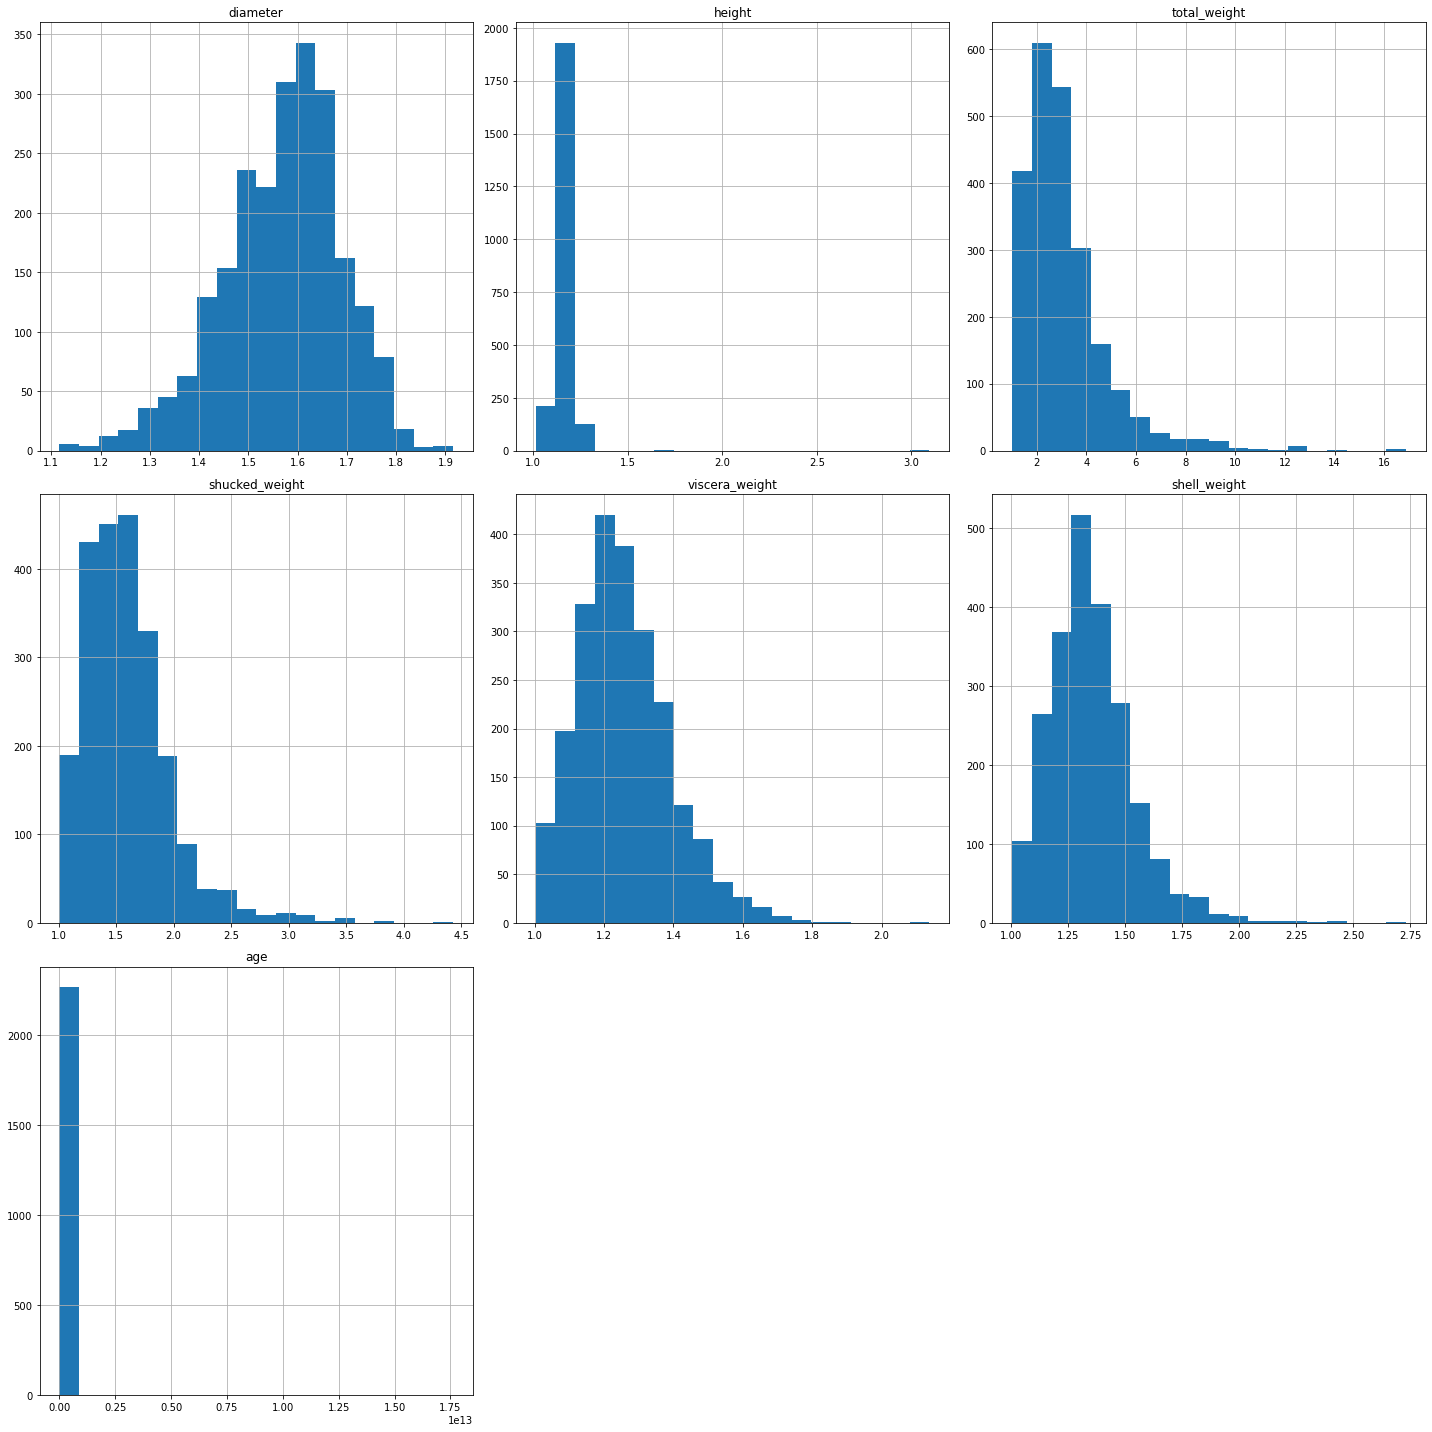

In [75]:
exp.hist(bins = 20, figsize = (20,20))
plt.tight_layout()
plt.show()

In [76]:
pd.plotting.scatter_matrix(exp, alpha=0.6, figsize=(17, 17), diagonal='hist')

<h1>Part Two: Supervised Learning Methods</h1>

<h3>Examining Target Feature</h3>

In [ ]:
y_train.hist(bins = 20, figsize = (15,15))

The histogram for the target feature shows that although there is a slight left skew, the data is generally unimodal and close to a Gaussian/normal distribution.

Because the target feature features continuous variables, the most readily available machine learning algorithm is one of regression. However, there are some steps to before the model can be fit to the training data. For example, the distribution of the data earlier showed that the range in values per feature had different variance ranges. This can potentially affect the calculations in an algorithm, so normalizing the data to a particular range will assist in that.

<h3>Feature Scaling</h3>

In [ ]:
from sklearn.preprocessing import StandardScaler
X_train.var()

The variance for the training data shows that the features use different scales. This makes sense because weight is a metric different from physical size, and age is not a measurement of size or weight in any way. Therefore, the features of this dataset need to be put in the same linear space, meaning they must be standardized.

In [ ]:
ss = StandardScaler()
# create a scaled dataset using the prepared datasets earlier (cell #25)
abalone_scaled = pd.DataFrame(ss.fit_transform(abalone_df.drop('sex', axis = 1)), columns = abalone_df.drop('sex', axis = 1).columns)

# split the scaled dataset into predictor features and target features
# create data frame consisting of numeric predictors
X_scaled = abalone_scaled.drop(['shell_length'], axis = 1)

# target feature
y_scaled = abalone_scaled['shell_length']

In [ ]:
# check the scaled data frame
print(X_scaled.head())

In [ ]:
print(X_scaled.var())

<h1>Algorithm #1: Linear Models</h1>

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
reg = LinearRegression()

In [ ]:
# create scaled train and test data
X_scale_train, X_scale_test, y_scale_train, y_scale_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 42, stratify = X_cat)

# fit the model
reg.fit(X_scale_train, y_scale_train)

# predict using the model on the test data
y_scale_pred = reg.predict(X_scale_test)

In [44]:
# Calculate the MSE and MAE and R^2
print("R^2: {}".format(reg.score(X_scale_test, y_scale_test)))
rmse = np.sqrt(mean_squared_error(y_scale_test, y_scale_pred))
mae = mean_absolute_error(y_scale_test, y_scale_pred)
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Absolute Error: {}".format(mae))

NameError: name 'X_scale_test' is not defined

Cross-validation needs to be performed to assess the model's ability to generalize on different datasets.  The above R^2 displayed a value of 0.959, stating that the model is accounting for about 96% of the variability in the data.  However, this could be due to overfitting.

In [ ]:
from sklearn.model_selection import cross_val_score

# instantiate a 5-fold cross validation variable
cv_5 = cross_val_score(reg, X_scaled, y_scaled, cv=5)


# instantiate a 10-fold cross validation variable
cv_10 = cross_val_score(reg, X_scaled, y_scaled, cv=10)

In [ ]:
# 5-fold CV results
print("5-fold cross validation mean: {}".format(np.mean(cv_5)))
print("5-fold cross validation median: {}".format(np.median(cv_5)))
print("5-fold cross validation standard deviation: {}".format(np.std(cv_5)))

In [ ]:
# 10-fold CV results
print("10-fold cross validation mean: {}".format(np.mean(cv_10)))
print("10-fold cross validation median: {}".format(np.median(cv_10)))
print("10-fold cross validation standard deviation: {}".format(np.std(cv_10)))

In [ ]:
# Ridge regularization
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(X_scale_train, y_scale_train)
cv_ridge_5 = cross_val_score(ridge, X_scaled, y_scaled, cv=5, scoring='r2')
cv_ridge_10 = cross_val_score(ridge, X_scaled, y_scaled, cv=10, scoring='r2')

In [ ]:
# Ridge 5-fold CV
print("5-fold Ridge CV mean: {}".format(np.mean(cv_ridge_5)))
print("5-fold Ridge CV median: {}".format(np.median(cv_ridge_5)))
print("5-fold Ridge CV deviation: {}".format(np.std(cv_ridge_5)))

In [ ]:
# Ridge 10-fold CV
print("10-fold Ridge CV mean: {}".format(np.mean(cv_ridge_10)))
print("10-fold Ridge CV median: {}".format(np.median(cv_ridge_10)))
print("10-fold Ridge CV deviation: {}".format(np.std(cv_ridge_10)))

The Ridge regression with cross validation showed a similar R^2 value to the other earlier models with very minor improvements, supporting the idea that the model does a good job at explaining the variability within the dataset. However, additional testing can be done; for example, grid search can be used to find the best alpha values.

In [ ]:
from sklearn.model_selection import GridSearchCV

n_samples, n_features = 10, 5
rng = np.random.RandomState(0)
y = rng.randn(n_samples)
X = rng.randn(n_samples, n_features)

parameters = {'alpha':[1, 10]}

model = Ridge()
ridge_grid = GridSearchCV(model, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
grid_search_result = ridge_grid.fit(X_scale_train, y_scale_train)
grid_search_result.best_estimator_

print(grid_search_result.best_estimator_)

In [ ]:
# use the parameters above to fit the data
best_ridge = grid_search_result.best_estimator_
best_ridge.fit(X_scale_train, y_scale_train)

best_y_scale_pred = best_ridge.predict(X_scale_test)

In [ ]:
print("R^2: {}".format(best_ridge.score(X_scale_test, y_scale_test)))
best_rmse = np.sqrt(mean_squared_error(y_scale_test, best_y_scale_pred))
best_mae = mean_absolute_error(y_scale_test, best_y_scale_pred)
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Absolute Error: {}".format(mae))

<h1>Algorithm #2: Random Forest Regression</h1>

Because Random Forest is a tree-based model, it does not require feature scaling the same way linear models do.

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

# Instantiate a model using default parameters
rf = RandomForestRegressor(random_state = 42)

In [47]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [48]:
y_pred = rf.predict(X_test)

In [49]:
print("R^2: {}".format(rf.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print("Root Mean Squared Error: {}".format(rmse))
print("Mean Absolute Error: {}".format(mae))

R^2: 0.9572402091494662
Root Mean Squared Error: 0.01981710909923913
Mean Absolute Error: 0.0148994708994709


In [50]:
# Hyperparameter tuning

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [51]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [54]:
rf_tuned = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 50, cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

Note: Setting n_iter to 100 and cv to 5 means that 100 different combinations will be searched and 5-fold cross validation will be attempted.  This will reduce overfitting and cover more search space, but running the model to fit the dataset will take runtime of 40 ~ 45 minutes.  It may be worth setting the arguments to smaller values, at the expense of result quality.

In [55]:
rf_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   0.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.1s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   4.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 10.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=10, n_jobs=None,
                                                   oob_score=False,
                                                   random_state=4...


In [57]:
# display the best parameters
rf_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

When n_iter was set to 100, cv was set to 5, and a random_state of 42 was used, the following parameters were determined to be the best for the dataset: 

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

Since the best parameters are now known, they can passed in to a new instance of a GridSearchCV

In [58]:
from sklearn.model_selection import GridSearchCV 

rf_2 = RandomForestRegressor(random_state = 42)

In [59]:
params = {
 'n_estimators': [400],
 'min_samples_split': [10],
 'min_samples_leaf': [4],
 'max_features': ['auto'],
 'max_depth': [70],
 'bootstrap': [True]
}

grid = GridSearchCV(estimator = rf_2, param_grid = params, cv = 3, n_jobs = -1, verbose = 2)

In [60]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   1.5s
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   1.5s
[CV] bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400 
[CV]  bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=400, total=   1.5s


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    4.5s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [

In [66]:
y_grid_pred = grid.predict(X_test)

In [69]:
print("R^2: {}".format(grid.score(X_test, y_test)))
mae = mean_absolute_error(y_test, y_grid_pred)
print("Mean Absolute Error: {}".format(mae))
rmse = np.sqrt(mean_squared_error(y_test, y_grid_pred))
print("Root Mean Squared Error: {}".format(rmse))


R^2: 0.9615711863075428
Mean Absolute Error: 0.014184790062540828
Root Mean Squared Error: 0.01878672175088988


The optimized Random Forest using GridSearchCV showed only a very minor improvement compared to the base code.

Base model:\
R^2: 0.9572402091494662\
Root Mean Squared Error: 0.01981710909923913\
Mean Absolute Error: 0.0148994708994709\

Grid Search optimized model:\
R^2: 0.9615711863075428\
Mean Absolute Error: 0.014184790062540828\
Root Mean Squared Error: 0.01878672175088988\